In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.metrics import structural_similarity as compare_ssim

def show_img(img, text = 'a'):
    cv2.imshow('f{text}', img)
    #cv2.waitKey()
    #cv2.destroyAllWindows()

def getSubtractedImg(R, L_f):
    sqrt_img = np.sqrt(np.power(np.add(R, np.multiply(L_f, -1)), 2))
    sub_img  = np.clip(a = sqrt_img, a_min = 0, a_max = 255)
    # sub_img = np.clip(a = np.add(R, np.multiply(L_f, -1)), a_min = 0, a_max = 255)
    return np.uint8(sub_img)

def fft_(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum, fshift

def HPF_(shift, val):
    rows, cols               = shift.shape
    crow,ccol = round(rows/2), round(cols/2)
    shift[crow-int(val/2):crow+int(val/2), ccol-int(val/2):ccol+int(val/2)] = 0
    ishift             = np.fft.ifftshift(shift)
    back               = np.fft.ifft2(ishift) 
    back               = np.abs(back)
    magnitude_spectrum = 20*np.log(np.abs(shift))
    return back, magnitude_spectrum

subject_type = ['normal', 'moderate', 'severe']

In [ ]:
for type_ in subject_type:
    subject_id = [subject for subject in os.listdir(f'./dataset/{type_}')]
    for id_ in subject_id:
        data_path    = f'./dataset/{type_}/{id_}/axial/'
        files = [file for file in os.listdir(data_path) if file.endswith('.tif')]
        imgs = []
        for file in files:
            imgs.append(cv2.imread(data_path+file, cv2.IMREAD_GRAYSCALE))
        imgs = np.array(imgs)
        for idx, img in enumerate(imgs):
            R, L                = img[:, :256], np.fliplr(img[:, 256:])
            simg                = getSubtractedImg(R, L)
            new_img             = np.ndarray((512,768))
            new_img[:,    :256] = simg
            new_img[:, 256:512] = R
            new_img[:, 512:768] = L
            save_dir            = f'./subtracted/original/{type_}_{id_}/'
            if not os.path.isdir(save_dir):
                os.mkdir(save_dir)
            cv2.imwrite(f'{save_dir}{idx}.png', new_img)

In [101]:


subject_type = ['normal', 'moderate', 'severe']

start = 150

for type_ in subject_type:
    subject_id = [subject for subject in os.listdir(f'./dataset/{type_}')]
    for id_ in subject_id:
        data_path    = f'./dataset/{type_}/{id_}/axial/'
        files = [file for file in os.listdir(data_path) if file.endswith('.tif')]
        imgs = []
        for file in files:
            imgs.append(cv2.imread(data_path+file, cv2.IMREAD_GRAYSCALE))
        imgs = np.array(imgs)
        for idx, img in enumerate(imgs):
            R, L                      = img[start:start+256, :256], np.fliplr(img[start:start+256, 256:])
            S                         = getSubtractedImg(R, L)
            new_img                   = np.ndarray((1024,768))
            new_img[:256,    :256]    = S
            new_img[:256, 256:512]    = R
            new_img[:256, 512:   ]    = L
            
            S_fft, S_shift            = fft_(S)
            R_fft, R_shift            = fft_(R)
            L_fft, L_shift            = fft_(L)
            new_img[256:512,    :256] = S_fft
            new_img[256:512, 256:512] = R_fft
            new_img[256:512, 512:   ] = L_fft
            
            S_back, S_HPF_fft         = HPF_(S_shift, 25)
            R_back, R_HPF_fft         = HPF_(R_shift, 25)
            L_back, L_HPF_fft         = HPF_(L_shift, 25)
            
            new_img[512:768,    :256] = S_back
            new_img[512:768, 256:512] = R_back
            new_img[512:768, 512:   ] = L_back
            new_img[768:   ,    :256] = S_HPF_fft
            new_img[768:   , 256:512] = R_HPF_fft
            new_img[768:   , 512:   ] = L_HPF_fft
            
            
            save_dir            = f'./fft/original/{type_}_{id_}/'
            
            if not os.path.isdir(save_dir):
                os.mkdir(save_dir)
            cv2.imwrite(f'{save_dir}{idx}.png', new_img)
            

C:\Users\Kichang\AppData\Local\Temp\ipykernel_11848\2862086407.py:12: RuntimeWarning: invalid value encountered in sqrt
  sqrt_img = np.sqrt(np.power(np.add(R, np.multiply(L_f, -1)), 2))
C:\Users\Kichang\AppData\Local\Temp\ipykernel_11848\4260269931.py:14: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))
C:\Users\Kichang\AppData\Local\Temp\ipykernel_11848\4260269931.py:4: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))


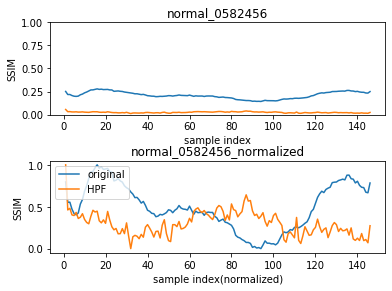

C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))


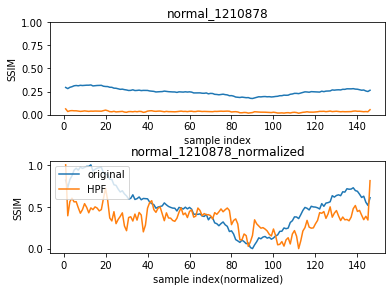

C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))


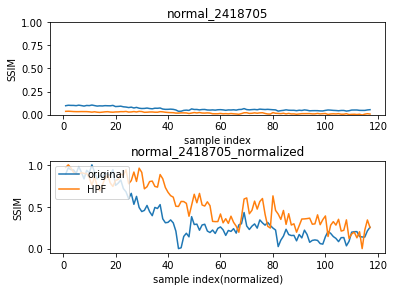

C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))
C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:21: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


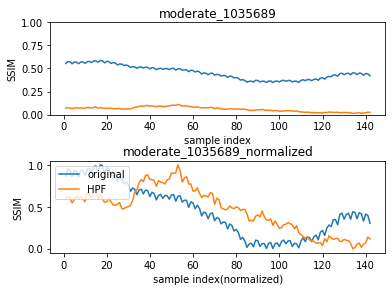

C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))


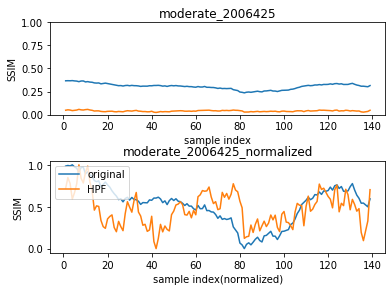

C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))


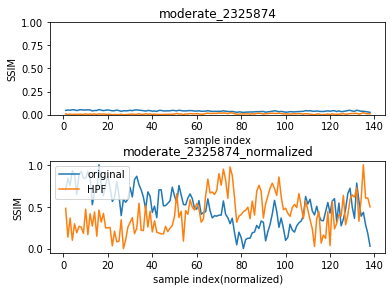

C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))


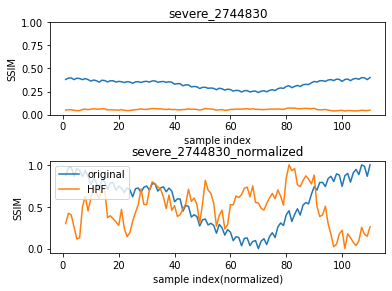

C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))
C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:21: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


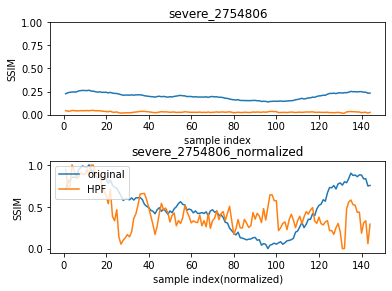

C:\Users\Kichang\AppData\Local\Temp\ipykernel_54016\1392031052.py:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(shift))


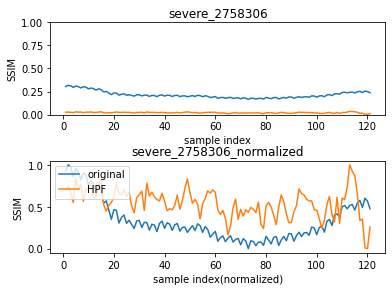

In [25]:
def get_SSIM(imageA, imageB):
    #grayA = cv.cvtColor(imageA, cv.COLOR_BGR2GRAY)
    #grayB = cv.cvtColor(imageB, cv.COLOR_BGR2GRAY)
    score, diff = compare_ssim(imageA, imageB, full=True)
    diff = (diff * 255).astype('uint8')
    return score, diff

def scale_minmax(data):
    data     = np.array(data)
    max, min = data.max(), data.min()
    data     = (data - min) / (max - min)
    return data

'''
subject에 대한 샘플 idx에 따른 SSIM 값의 변화를 시각화하자.
'''

start = 150

for type_ in subject_type:
    subject_id = [subject for subject in os.listdir(f'./dataset/{type_}')]
    for id_ in subject_id:
        data_path    = f'./dataset/{type_}/{id_}/axial/'
        files = [file for file in os.listdir(data_path) if file.endswith('.tif')]
        imgs = []
        for file in files:
            imgs.append(cv2.imread(data_path+file, cv2.IMREAD_GRAYSCALE))
        imgs      = np.array(imgs)
        idxs      = range(1, len(imgs)+1)
        SSIMs     = []
        HPF_SSIMs = []
        for idx, img in enumerate(imgs):
            R, L                      = img[start:start+256, :256], np.fliplr(img[start:start+256, 256:])
            R_fft, R_shift            = fft_(R)
            L_fft, L_shift            = fft_(L)
            HPF_R, R_HPF_fft          = HPF_(R_shift, 25)
            HPF_L, L_HPF_fft          = HPF_(L_shift, 25)
            SSIM, _                   = get_SSIM(R, L)
            HPF_SSIM, _               = get_SSIM(HPF_R, HPF_L)
            SSIMs.append(SSIM)
            HPF_SSIMs.append(HPF_SSIM)
        norm_SSIMs                     = scale_minmax(SSIMs)
        norm_HPF_SSIMs                 = scale_minmax(HPF_SSIMs)
        
        plt.figure()
        plt.subplot(2, 1, 1)
        
        plt.plot(idxs, SSIMs,     label = 'original')
        plt.plot(idxs, HPF_SSIMs, label = 'HPF')
        plt.ylim(0,1)
        plt.title(f'{type_}_{id_}')
        plt.xlabel('sample index')
        plt.ylabel('SSIM')
        plt.subplot(2, 1, 2)
        plt.plot(idxs, norm_SSIMs,     label = 'original')
        plt.plot(idxs, norm_HPF_SSIMs, label = 'HPF')
        plt.title(f'{type_}_{id_}_normalized')
        plt.xlabel('sample index(normalized)')
        plt.ylabel('SSIM')
        plt.legend(loc = 'upper left')
        plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
        plt.show()
        
    '''
    HPF한 이유가 볼 필요가 없는 유사한 부분들을 날려버리고 지금 중요한 귀 내부 뼈의 구조를 잘 관찰할 수 있냐(염증이 없냐) 없냐(염증이 있냐)를 볼려는 것임.
    그런데 지금 입력을 보면 나오는 SSIM 값 자체를 보면 유사도가 낮아짐. 개인적인 생각으로는 normalized SSIM이라면 그 차이가 잘 보이는 구간에서 이 SSIM 더 떨어지는 양상을 보여줬으면 했는데...?
    완전 패턴이 없어보이는것을 어떻게 해석해야할까...
    '''